In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import kurtosis, skew
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scikit_posthocs as sp
from matplotlib.patches import Patch

In [2]:
tempTopDir = '/Volumes/Britt_SSD/ReDoEvals3/UserStudy/'
filePath = os.path.join(tempTopDir, 'GP_Main.parquet')
save_path = '/Users/brittdavis/iCloud/Documents/School/Thesis/Stimuli_PostFeedback/'

In [3]:
filePath = os.path.join(tempTopDir, 'likertSlim_corrected.parquet')
likertSlim = pd.read_parquet(filePath)

In [4]:
likertSlim.visuals.unique()

array(['Blur+Charts', 'Charts', 'Blurred', 'Video'], dtype=object)

In [5]:
tmp1 = likertSlim[['blurring_helpful_1', \
      'blurring_helpful_2', 'charts_helpful_1', 'charts_helpful_2', 'info_sufficient_1', \
            'info_sufficient_2', 'irrelevant_distracting_1', 'irrelevant_distracting_2', \
            'scenarios_helpful_1', 'scenarios_helpful_2','17.0','18.0','19.0','20.0']]
tmp1['likertMode_AndComp'] = np.where(tmp1.mode(axis=1)[2].notnull(),tmp1.mode(axis=1)[1],tmp1.mode(axis=1)[0])
likertSlim['likertMode_AndComp'] = tmp1['likertMode_AndComp']

/Users/brittdavis/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [6]:

likertSlim['visuals'] = np.where(likertSlim['visuals']=="Visuals","Charts",
                        np.where(likertSlim['visuals']=="Blur_Plus_Vis","Blur+Charts",likertSlim['visuals']))

df = likertSlim.copy()

fnt = 24
fnt2 = 19
fnt3 = 15

rSz = (12,7)
sqSz = (12,12)

AL = 0.26

saveFigs = True

boringBG = 'gold'

In [7]:
def ols_formula(dependent_var, *cat_var, categorical):
    if categorical:
        stringThing = dependent_var + ' ~ C(' + ' + '.join(cat_var) + ")"
    else:
        stringThing = dependent_var + ' ~ (' + ' + '.join(cat_var) + ")"
#     print("passing to the OLS: " + str(stringThing))
    return stringThing

def plotResiduals(a,b,c, categorical):
    form = ols_formula(a, b, categorical=categorical)
    model = ols(form, data=c.copy()).fit()
    fig = plt.figure(figsize= (10, 10))
    ax = fig.add_subplot(111)
    normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
    ax.set_title("Prob plot of model residual's " + str(a) + " vs " + str(b), fontsize= 20)
    ax.set
    plt.show()
    sns.residplot(a,b,data=c,dropna=True,robust=True)
    plt.show()
    sns.residplot(b,a,data=c,dropna=True,robust=True)
    plt.show()
    print(stats.shapiro(model.resid))
              
# plotResiduals('agTotPerc','likertMode',df,categorical=True)
# plotResiduals('tot1Perc','likert1Mode',df,categorical=True)
# plotResiduals('tot2Perc','likert2Mode',df,categorical=True)
# plotResiduals('compPerc','CompResponseMode',df,categorical=True)

# plotResiduals('vidPlayed','timeTaken_Demographics',df,categorical=True)
# sns.regplot('vidPlayed','timeTaken_Demographics',df)

# Conclusions: Interesting, but ANOVA would work for none of these. 

/Users/brittdavis/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/brittdavis/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


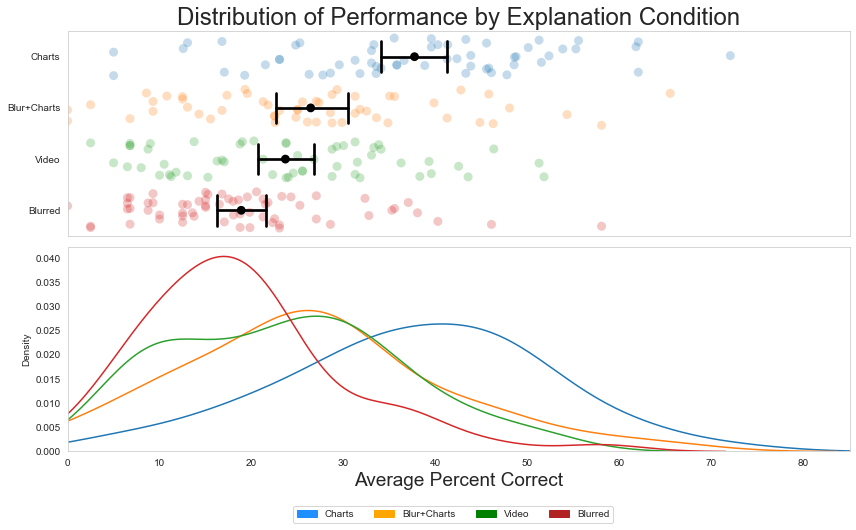

In [17]:
sns.set_style('whitegrid')
cp = sns.color_palette('tab10',4)
sns.set_palette(cp)

fig, axes = plt.subplots(nrows=2,ncols=1,figsize=rSz, sharex=True)

df['tot_correctedPerc'] = pd.to_numeric(df['tot_correctedPerc'])
g = sns.pointplot('tot_correctedPerc','visuals', zorder=10, data=df, order=["Charts", "Blur+Charts", "Video","Blurred"], \
                  alpha=1,join=False, ci=95, color='black',capsize=0.6, ax=axes[0])
g.set_title("Distribution of Performance by Explanation Condition",fontsize=fnt)

g = sns.stripplot('tot_correctedPerc','visuals',data=df, zorder=0, jitter=0.37, \
                  order=["Charts", "Blur+Charts", "Video","Blurred"],alpha=AL, s=9, ax=axes[0])
g.set_xlim((0,85))
g.set_xlabel("")
g.set_ylabel("")

for vis in ["Charts", "Blur+Charts", "Video","Blurred"]:
    tips_agg = df[df['visuals']==vis]
    i=sns.kdeplot(data=tips_agg,x='tot_correctedPerc',bw_adjust=0.95,ax=axes[1])
    i.set_xlabel("Average Percent Correct", fontsize=fnt2)
    
#     i.set_xlim((0,90))
axes[0].xaxis.grid(False) # Hide the horizontal gridlines
axes[1].xaxis.grid(False) # Show the vertical gridlines
axes[0].yaxis.grid(False) # Hide the horizontal gridlines
axes[1].yaxis.grid(False) # Show the vertical gridlines

legend_elements = [Patch(facecolor='dodgerblue', edgecolor='dodgerblue',
                         label='Charts'),
                   Patch(facecolor='orange', edgecolor='orange',
                         label='Blur+Charts'),
                   Patch(facecolor='green', edgecolor='g',
                         label='Video'),
                  Patch(facecolor='firebrick', edgecolor='firebrick',
                         label='Blurred')]

fig.legend(handles=legend_elements, bbox_to_anchor= (0.72, -0.001), ncol=4)

plt.tight_layout()
if saveFigs:
    filename = "Distribution_ofPerformance_byExplanationCondition.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    fig.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()


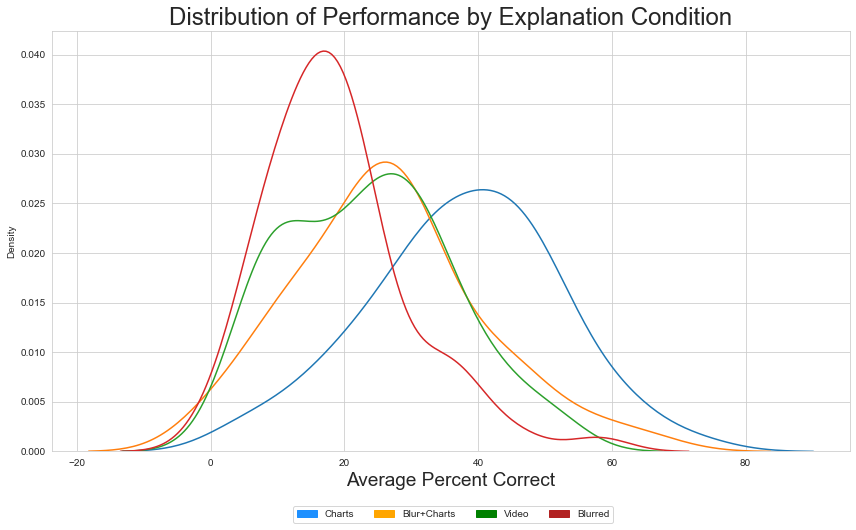

In [8]:
sns.set_style('whitegrid')
cp = sns.color_palette('tab10',4)
sns.set_palette(cp)

fig, axes = plt.subplots(nrows=1,ncols=1,figsize=rSz)

df['tot_correctedPerc'] = pd.to_numeric(df['tot_correctedPerc'])
# g = sns.pointplot('totPerc','visuals', zorder=10, data=df, order=["Charts", "Blur+Charts", "Video","Blurred"], \
#                   alpha=1,join=False, ci=95, color='black',capsize=0.6, ax=axes[0])
# g.set_title("Distribution of Performance by Explanation Condition",fontsize=fnt)

# g = sns.stripplot('totPerc','visuals',data=df, zorder=0, jitter=0.37, \
#                   order=["Charts", "Blur+Charts", "Video","Blurred"],alpha=AL, s=9, ax=axes[0])
# g.set_xlim((0,90))
# g.set_xlabel("")
# g.set_ylabel("")

for vis in ["Charts", "Blur+Charts", "Video","Blurred"]:
    tips_agg = df[df['visuals']==vis]
    i=sns.kdeplot(data=tips_agg,x='tot_correctedPerc',bw_adjust=0.95,ax=axes)
    i.set_xlabel("Average Percent Correct", fontsize=fnt2)
    
#     i.set_xlim((0,100))
    i.set_title("Distribution of Performance by Explanation Condition",fontsize=fnt)
# axes[0].xaxis.grid(False) # Hide the horizontal gridlines
axes.xaxis.grid(True) # Show the vertical gridlines
# axes[0].yaxis.grid(False) # Hide the horizontal gridlines
axes.yaxis.grid(True) # Show the vertical gridlines

legend_elements = [Patch(facecolor='dodgerblue', edgecolor='dodgerblue',
                         label='Charts'),
                   Patch(facecolor='orange', edgecolor='orange',
                         label='Blur+Charts'),
                   Patch(facecolor='green', edgecolor='g',
                         label='Video'),
                  Patch(facecolor='firebrick', edgecolor='firebrick',
                         label='Blurred')]

fig.legend(handles=legend_elements, bbox_to_anchor= (0.72, -0.001), ncol=4)

plt.tight_layout()
if saveFigs:
    filename = "Distribution_ofPerformance_byExplanationCondition_CurvesOnly.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    fig.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()



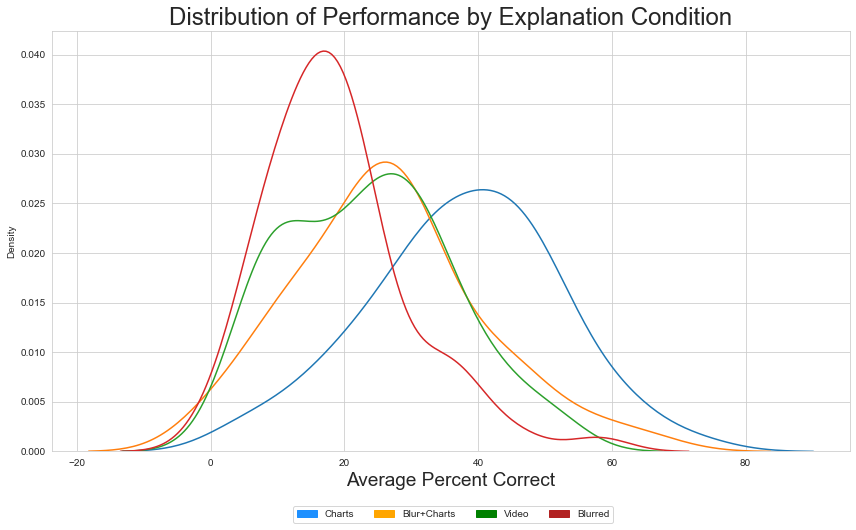

In [9]:
sns.set_style('whitegrid')
cp = sns.color_palette('tab10',4)
sns.set_palette(cp)

fig, axes = plt.subplots(nrows=1,ncols=1,figsize=rSz)

df['totPerc'] = pd.to_numeric(df['tot_correctedPerc'])
# g = sns.pointplot('totPerc','visuals', zorder=10, data=df, order=["Charts", "Blur+Charts", "Video","Blurred"], \
#                   alpha=1,join=False, ci=95, color='black',capsize=0.6, ax=axes[0])
# g.set_title("Distribution of Performance by Explanation Condition",fontsize=fnt)

# g = sns.stripplot('totPerc','visuals',data=df, zorder=0, jitter=0.37, \
#                   order=["Charts", "Blur+Charts", "Video","Blurred"],alpha=AL, s=9, ax=axes[0])
# g.set_xlim((0,90))
# g.set_xlabel("")
# g.set_ylabel("")

for vis in ["Charts", "Blur+Charts", "Video","Blurred"]:
    tips_agg = df[df['visuals']==vis]
    i=sns.kdeplot(data=tips_agg,x='totPerc',bw_adjust=0.95,ax=axes)
    i.set_xlabel("Average Percent Correct", fontsize=fnt2)
    
#     i.set_xlim((0,100))
    i.set_title("Distribution of Performance by Explanation Condition",fontsize=fnt)
# axes[0].xaxis.grid(False) # Hide the horizontal gridlines
axes.xaxis.grid(True) # Show the vertical gridlines
# axes[0].yaxis.grid(False) # Hide the horizontal gridlines
axes.yaxis.grid(True) # Show the vertical gridlines

legend_elements = [Patch(facecolor='dodgerblue', edgecolor='dodgerblue',
                         label='Charts'),
                   Patch(facecolor='orange', edgecolor='orange',
                         label='Blur+Charts'),
                   Patch(facecolor='green', edgecolor='g',
                         label='Video'),
                  Patch(facecolor='firebrick', edgecolor='firebrick',
                         label='Blurred')]

fig.legend(handles=legend_elements, bbox_to_anchor= (0.72, -0.001), ncol=4)

plt.tight_layout()
if saveFigs:
    filename = "Distribution_ofPerformance_byExplanationCondition_CurvesOnly_Uncorrected.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    fig.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()

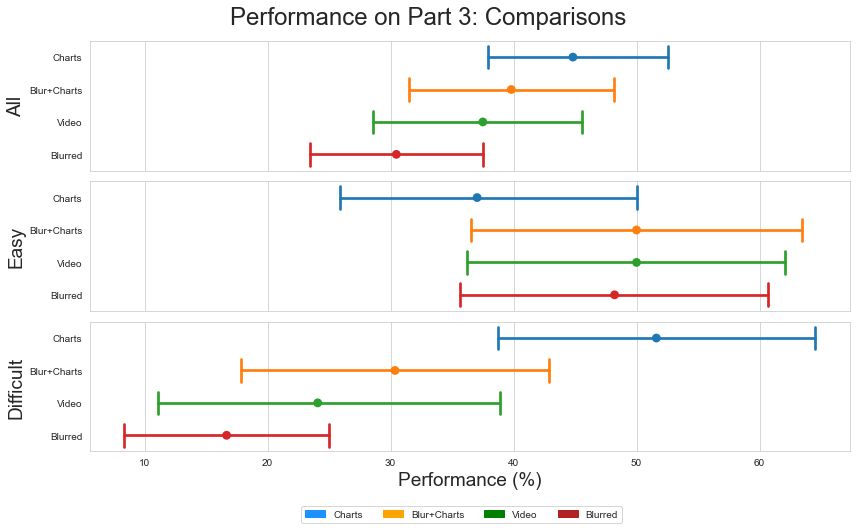

In [10]:
sns.set_palette(cp)
# histograms of comp versus ag
fig, axes = plt.subplots(nrows=3,ncols=1,figsize=rSz, sharey=True, sharex=True)

g = sns.pointplot(data=df, x="comp_correctedPerc",y='visuals', ax=axes[0],capsize=.7, \
                  order=["Charts", "Blur+Charts", "Video","Blurred"], palette=cp, ci=90)
# g.set_xlim(40,85)
g.set_title('Part 3')
g.set_xlabel("")
g.set_ylabel("All",fontsize=fnt2)
g.set_title("")

g = sns.pointplot(data=df[df['difficulty']=="Easy"], x="comp_correctedPerc",y='visuals',\
                  ax=axes[1],capsize=.7, order=["Charts", "Blur+Charts", "Video","Blurred"], palette=cp, ci=95)
# g.set_xlim(40,85)
g.set_title('Part 3')
g.set_xlabel("")
g.set_ylabel("Easy",fontsize=fnt2)
g.set_title("")

g = sns.pointplot(data=df[df['difficulty']=="Difficult"], x="comp_correctedPerc",y='visuals',\
                  ax=axes[2],capsize=.7, order=["Charts", "Blur+Charts", "Video","Blurred"], palette=cp, ci=95)
# g.set_xlim(40,85)
g.set_title('Part 3')
g.set_xlabel("Performance (%)",fontsize=fnt2)
g.set_ylabel("Difficult",fontsize=fnt2)
g.set_title("")

fig.suptitle("Performance on Part 3: Comparisons",fontsize=fnt)
axes[0].xaxis.grid(True) # Hide the horizontal gridlines
axes[1].xaxis.grid(True) # Show the vertical gridlines
axes[2].xaxis.grid(True) # Hide the horizontal gridlines

legend_elements = [Patch(facecolor='dodgerblue', edgecolor='dodgerblue',
                         label='Charts'),
                   Patch(facecolor='orange', edgecolor='orange',
                         label='Blur+Charts'),
                   Patch(facecolor='green', edgecolor='g',
                         label='Video'),
                  Patch(facecolor='firebrick', edgecolor='firebrick',
                         label='Blurred')]

fig.legend(handles=legend_elements, bbox_to_anchor= (0.73, -0.001), ncol=4)

plt.tight_layout()
if saveFigs:
    filename = "Performance_onP3.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    fig.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# fig, axes = plt.subplots(nrows=1,ncols=2,figsize=fgSz,sharey=True)

# binNum = 50
# binW = 0.32


# tmp = likertSlim.copy()
# g=sns.histplot(tmp['agTotPerc_Z'],ax=axes[0],bins=binNum, binwidth=binW, kde=True, common_norm=True)
# g.set_title('Parts 1 & 2',fontsize=fnt)
# g.set_xlabel("Performance (%)",fontsize=fnt)
# g.set_ylabel("Number of Participants",fontsize=fnt)
# # g.set_xlim((0,100))


# # d = np.diff(np.unique(tmp['compPerc'])).min()
# # left_of_first_bin = tmp['compPerc'].min() - float(d)/2
# # right_of_last_bin = tmp['compPerc'].max() + float(d)/2
# # axes[1].hist(tmp['compPerc'], np.arange(left_of_first_bin, right_of_last_bin + d, d), color='powderblue', ec = "black")

# binNum = 10
# binW = 0.81
# g=sns.histplot(tmp['compPerc_Z'],ax=axes[1],bins=binNum, binwidth=binW,kde=True, common_norm=True)
# g.set_title('Part 3',fontsize=fnt)
# # g.set_xlim((0,100))
# g.set_xlabel("Performance (%)",fontsize=fnt)

# axes[0].yaxis.grid(True) # Hide the horizontal gridlines
# axes[1].yaxis.grid(True) # Show the vertical gridlines


# binNum = 50
# binW = 0.32

# fig, axes = plt.subplots(nrows=1,ncols=2,figsize=fgSz,sharey=True)

# g=sns.histplot(tmp['likertMode_Z'],ax=axes[0],bins=binNum, binwidth=binW,kde=True, common_norm=True)
# g.set_title('Parts 1 & 2',fontsize=14)
# g.set_xlabel("Perception (Z-Score)",fontsize=fnt)
# g.set_ylabel("Number of Participants")
# # g.set_xlim((1,5))

# g=sns.histplot(tmp['CompResponseMode_Z'],ax=axes[1],bins=binNum, binwidth=binW,kde=True, common_norm=True)
# g.set_title('Part 3',fontsize=14)
# g.set_xlabel("Perception (Z-Score)",fontsize=fnt)
# # g.set_xlim((1,5))

# axes[0].yaxis.grid(True) # Hide the horizontal gridlines
# axes[1].yaxis.grid(True) # Show the vertical gridlines


<Figure size 576x576 with 0 Axes>

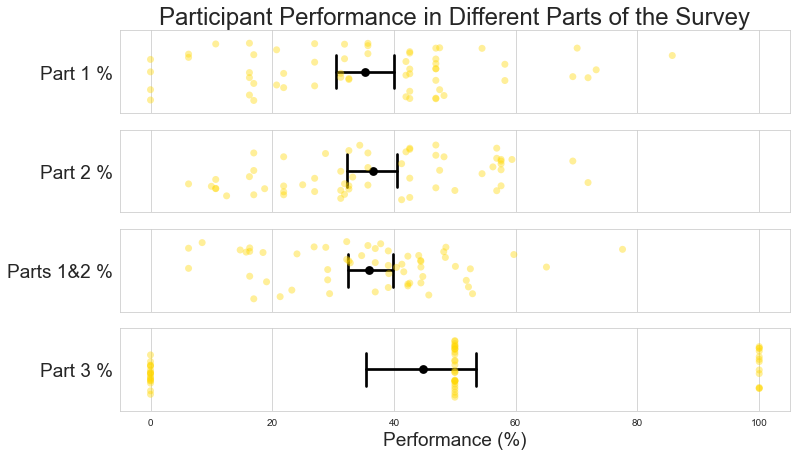

<Figure size 720x288 with 0 Axes>

<Figure size 1080x288 with 0 Axes>

<Figure size 1080x288 with 0 Axes>

<Figure size 1080x288 with 0 Axes>

In [11]:
sns.set_palette('tab10')
plt.figure(figsize=(8,8))
# tmp = likertSlim.reset_index()[['ParticipantPublicID','tot1Perc','tot2Perc','agTotPerc', \
#                                 'compPerc','totPerc']].melt('ParticipantPublicID', var_name='cols', \
#                                     value_name='vals')
# print(tmp)
# sns.pointplot(data=tmp, y='vals', x='cols', join=False, ci=100, orient='v')
# # plt.show()
# # print(tmp)
# # plt.figure(figsize=(15,4))
# sns.stripplot(data=tmp, y='vals', x='cols', orient='v',jitter=0.6, dodge=True)


j = 0.35
al = 0.4
sZ = 7
cS = 0.4


fig, axes = plt.subplots(nrows=4,ncols=1,figsize=rSz, sharex=True, sharey=False)
tmp= likertSlim.loc[(likertSlim['visuals'] == "Charts")]
tmp = tmp.reset_index()[['ParticipantPublicID','Qs1_CorrectedPerc']].melt('ParticipantPublicID', var_name='cols', \
                                    value_name='vals')


plt.figure(figsize=(10,4))
g1 = sns.stripplot(data=tmp, x='vals', y='cols', orient='h',jitter=j, alpha=al, s=sZ, ax=axes[0], dodge=True, color=boringBG)
g1 = sns.pointplot(data=tmp, x='vals', y='cols', orient='h',jitter=j,capsize=cS, alpha=al, s=sZ, ax=axes[0], dodge=True, color='black')
axes[0].set_xlabel("")
axes[0].set_ylabel("")
axes[0].set_yticklabels(["Part 1 %"], fontsize=fnt2)
# plt.show()

tmp= likertSlim.loc[(likertSlim['visuals'] == "Charts")]
tmp = tmp.reset_index()[['ParticipantPublicID','Qs2_CorrectedPerc']].melt('ParticipantPublicID', var_name='cols', \
                                    value_name='vals')
plt.figure(figsize=(15,4))
sns.stripplot(data=tmp, x='vals', y='cols', orient='h',jitter=j, alpha=al, s=sZ, ax=axes[1], dodge=True, color=boringBG)
sns.pointplot(data=tmp, x='vals', y='cols', orient='h',jitter=j, alpha=al,capsize=cS, s=sZ, ax=axes[1], dodge=True, color='black')
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].set_yticklabels(["Part 2 %"], fontsize=fnt2)

tmp = likertSlimtmp= likertSlim.loc[(likertSlim['visuals'] == "Charts")]
tmp = tmp.reset_index()[['ParticipantPublicID','1_2_correctedPerc']].melt('ParticipantPublicID', var_name='cols', \
                                    value_name='vals')
plt.figure(figsize=(15,4))
sns.stripplot(data=tmp, x='vals', y='cols', orient='h',jitter=j, alpha=al, s=sZ, ax=axes[2], dodge=True, color=boringBG)
sns.pointplot(data=tmp, x='vals', y='cols', orient='h',jitter=j, alpha=al,capsize=cS, s=sZ, ax=axes[2], dodge=True, color='black')
axes[2].set_xlabel("")
axes[2].set_ylabel("")
axes[2].set_yticklabels(["Parts 1&2 %"], fontsize=fnt2)

tmp= likertSlim.loc[(likertSlim['visuals'] == "Charts")]
tmp = tmp.reset_index()[['ParticipantPublicID','comp_correctedPerc']].melt('ParticipantPublicID', var_name='cols', \
                                    value_name='vals')
plt.figure(figsize=(15,4))
sns.stripplot(data=tmp, x='vals', y='cols', orient='h',jitter=j, alpha=al, s=sZ, ax=axes[3], dodge=True, color=boringBG)
sns.pointplot(data=tmp, x='vals', y='cols', orient='h',jitter=j, alpha=al,capsize=cS, s=sZ, ax=axes[3], dodge=True, color='black')
axes[3].set_ylabel("")
axes[3].set_xlabel("Performance (%)", fontsize=fnt2)
axes[3].set_yticklabels(["Part 3 %"], fontsize=fnt2)

# tmp = likertSlim.reset_index()[['ParticipantPublicID','totPerc']].melt('ParticipantPublicID', var_name='cols', \
#                                     value_name='vals')
# plt.figure(figsize=(15,4))
# sns.stripplot(data=tmp, x='vals', y='cols', orient='h',jitter=j, alpha=al, s=sZ, ax=axes[4], dodge=True, color='purple')
# sns.pointplot(data=tmp, x='vals', y='cols', orient='h',jitter=j, alpha=al, s=sZ, ax=axes[4], dodge=True, color='black')
# axes[4].set_xlabel("")
# axes[4].set_ylabel("")
# axes[4].set_yticklabels(["All %"])

axes[0].set_title("Participant Performance in Different Parts of the Survey", fontsize=fnt)

# plt.tight_layout()
if saveFigs:
    filename = "ParticipantPerformance_inDifferentParts_of_theSurvey.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    fig.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()

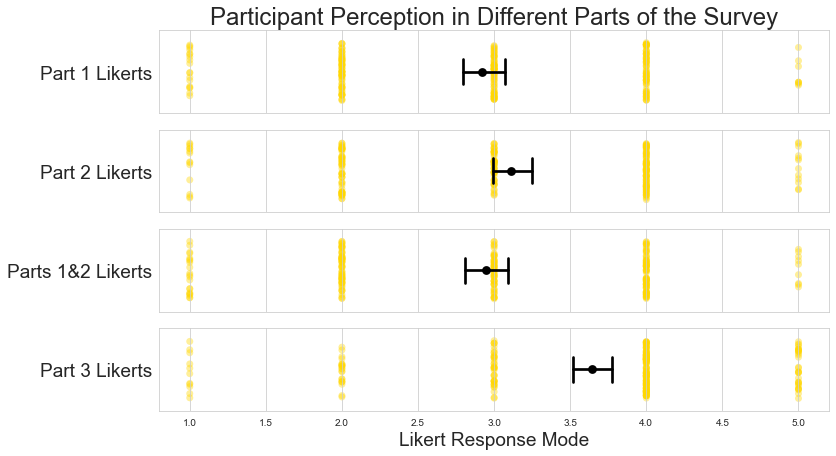

<Figure size 1080x288 with 0 Axes>

<Figure size 1080x288 with 0 Axes>

<Figure size 1080x288 with 0 Axes>

<Figure size 1080x288 with 0 Axes>

In [10]:
fig, axes = plt.subplots(nrows=4,ncols=1,figsize=rSz, sharex=True, sharey=False)

cS = 0.3

tmp = likertSlim.reset_index()[['ParticipantPublicID','likert1Mode']].melt('ParticipantPublicID', var_name='cols', \
                                    value_name='vals')
plt.figure(figsize=(15,4))
g1 = sns.stripplot(data=tmp, x='vals', y='cols', orient='h',jitter=j, alpha=al, s=sZ, ax=axes[0], dodge=True, color=boringBG, zorder=0)
g1 = sns.pointplot(data=tmp, x='vals', y='cols', orient='h',jitter=j, alpha=al, s=sZ, ax=axes[0], capsize = cS, color='black', zorder=10)
axes[0].set_xlabel("")
axes[0].set_ylabel("")
axes[0].set_yticklabels(["Part 1 Likerts"], fontsize=fnt2)
# plt.show()

tmp = likertSlim.reset_index()[['ParticipantPublicID','likert2Mode']].melt('ParticipantPublicID', var_name='cols', \
                                    value_name='vals')
plt.figure(figsize=(15,4))
sns.stripplot(data=tmp, x='vals', y='cols', orient='h',jitter=j, alpha=al, s=sZ, ax=axes[1], dodge=True, color=boringBG, zorder=0)
sns.pointplot(data=tmp, x='vals', y='cols', orient='h',jitter=j, alpha=al, s=sZ, ax=axes[1], capsize = cS, dodge=True, color='black', zorder=10)
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].set_yticklabels(["Part 2 Likerts"], fontsize=fnt2)

tmp = likertSlim.reset_index()[['ParticipantPublicID','likertMode']].melt('ParticipantPublicID', var_name='cols', \
                                    value_name='vals')
plt.figure(figsize=(15,4))
sns.stripplot(data=tmp, x='vals', y='cols', orient='h',jitter=j, alpha=al, s=sZ, ax=axes[2], dodge=True, color=boringBG, zorder=0)
sns.pointplot(data=tmp, x='vals', y='cols', orient='h',jitter=j, alpha=al, s=sZ, ax=axes[2], capsize = cS, dodge=True, color='black', zorder=10)
axes[2].set_xlabel("")
axes[2].set_ylabel("")
axes[2].set_yticklabels(["Parts 1&2 Likerts"], fontsize=fnt2)

tmp = likertSlim.reset_index()[['ParticipantPublicID','CompResponseMode']].melt('ParticipantPublicID', var_name='cols', \
                                    value_name='vals')
plt.figure(figsize=(15,4))
sns.stripplot(data=tmp, x='vals', y='cols', orient='h',jitter=j, alpha=al, s=sZ, ax=axes[3], dodge=True, color=boringBG, zorder=0)
sns.pointplot(data=tmp, x='vals', y='cols', orient='h',jitter=j, alpha=al, s=sZ, ax=axes[3], capsize = cS, dodge=True, color='black', zorder=10)
axes[3].set_xlabel("Likert Response Mode", fontsize=fnt2)
axes[3].set_ylabel("")
axes[3].set_yticklabels(["Part 3 Likerts"], fontsize=fnt2)

axes[0].set_title("Participant Perception in Different Parts of the Survey", fontsize=fnt)

# plt.tight_layout()
if saveFigs:
    filename = "ParticipantPerception_inDifferentParts_of_theSurvey.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    fig.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()

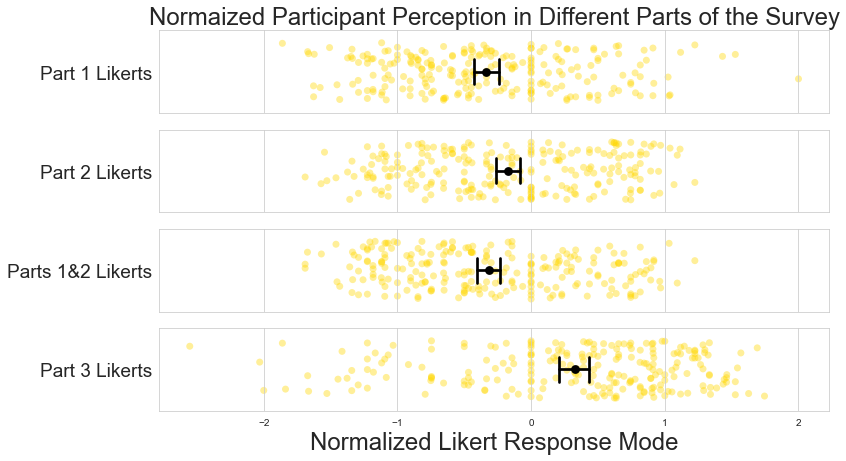

<Figure size 1080x288 with 0 Axes>

<Figure size 1080x288 with 0 Axes>

<Figure size 1080x288 with 0 Axes>

<Figure size 1080x288 with 0 Axes>

In [12]:
fig, axes = plt.subplots(nrows=4,ncols=1,figsize=rSz, sharex=True, sharey=False)

cS = 0.3

tmp = likertSlim.reset_index()[['ParticipantPublicID','likert1Mode_Z']].melt('ParticipantPublicID', var_name='cols', \
                                    value_name='vals')
plt.figure(figsize=(15,4))
g1 = sns.stripplot(data=tmp, x='vals', y='cols', orient='h',jitter=j, alpha=al, s=sZ, ax=axes[0], dodge=True, color=boringBG, zorder=0)
g1 = sns.pointplot(data=tmp, x='vals', y='cols', orient='h',jitter=j, alpha=al, s=sZ, ax=axes[0], capsize = cS, color='black', zorder=10)
axes[0].set_xlabel("")
axes[0].set_ylabel("")
axes[0].set_yticklabels(["Part 1 Likerts"], fontsize=fnt2)
# plt.show()

tmp = likertSlim.reset_index()[['ParticipantPublicID','likert2Mode_Z']].melt('ParticipantPublicID', var_name='cols', \
                                    value_name='vals')
plt.figure(figsize=(15,4))
sns.stripplot(data=tmp, x='vals', y='cols', orient='h',jitter=j, alpha=al, s=sZ, ax=axes[1], dodge=True, color=boringBG, zorder=0)
sns.pointplot(data=tmp, x='vals', y='cols', orient='h',jitter=j, alpha=al, s=sZ, ax=axes[1], capsize = cS, dodge=True, color='black', zorder=10)
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].set_yticklabels(["Part 2 Likerts"], fontsize=fnt2)

tmp = likertSlim.reset_index()[['ParticipantPublicID','likertMode_Z']].melt('ParticipantPublicID', var_name='cols', \
                                    value_name='vals')
plt.figure(figsize=(15,4))
sns.stripplot(data=tmp, x='vals', y='cols', orient='h',jitter=j, alpha=al, s=sZ, ax=axes[2], dodge=True, color=boringBG, zorder=0)
sns.pointplot(data=tmp, x='vals', y='cols', orient='h',jitter=j, alpha=al, s=sZ, ax=axes[2], capsize = cS, dodge=True, color='black', zorder=10)
axes[2].set_xlabel("")
axes[2].set_ylabel("")
axes[2].set_yticklabels(["Parts 1&2 Likerts"], fontsize=fnt2)

tmp = likertSlim.reset_index()[['ParticipantPublicID','CompResponseMode_Z']].melt('ParticipantPublicID', var_name='cols', \
                                    value_name='vals')
plt.figure(figsize=(15,4))
sns.stripplot(data=tmp, x='vals', y='cols', orient='h',jitter=j, alpha=al, s=sZ, ax=axes[3], dodge=True, color=boringBG, zorder=0)
sns.pointplot(data=tmp, x='vals', y='cols', orient='h',jitter=j, alpha=al, s=sZ, ax=axes[3], capsize = cS, dodge=True, color='black', zorder=10)
axes[3].set_xlabel("Normalized Likert Response Mode", fontsize=fnt)
axes[3].set_ylabel("")
axes[3].set_yticklabels(["Part 3 Likerts"], fontsize=fnt2)

axes[0].set_title("Normaized Participant Perception in Different Parts of the Survey", fontsize=fnt)

# plt.tight_layout()
if saveFigs:
    filename = "Normed_ParticipantPerception_inDifferentParts_of_theSurvey.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    fig.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()

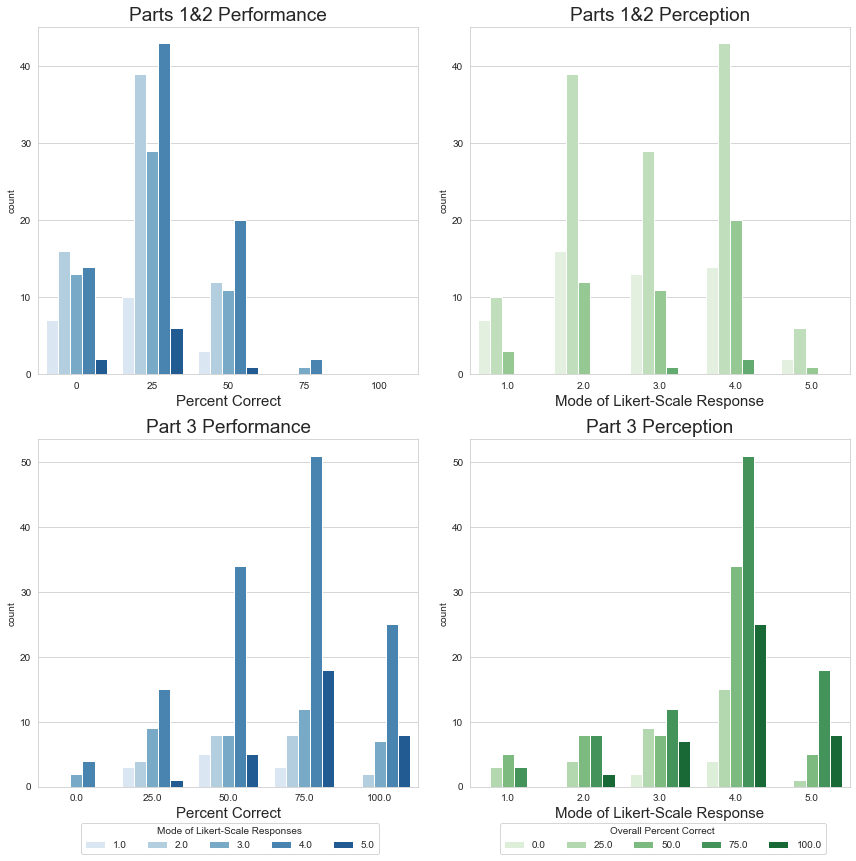

In [12]:
# try to make a grouped bar chart???
cut_bins = [0, 12.5, 37.5, 62.5, 87.5, 100]
# cut_bins = [0, 1, 25, 26, 50, 51, 75, 76, 100]

names = ['0','25', '50', '75', '100']
likertSlim['agBin'] = pd.cut(likertSlim['agTotPerc'],bins=cut_bins, labels = names)

cp = sns.color_palette('Greens',5)
sns.set_palette(cp)
fig, axes = plt.subplots(nrows = 2, ncols = 2,figsize=sqSz)
sns.countplot(data=likertSlim,x='CompResponseMode',hue='compPerc', ax=axes[1,1])
axes[1,1].set_title("Part 3 Perception", fontsize=fnt2)
axes[1,1].set_xlabel("Mode of Likert-Scale Response", fontsize=fnt3)
axes[1,1].legend(bbox_to_anchor= (0.95, -0.09),ncol=5,title="Overall Percent Correct");

cp = sns.color_palette('Blues',5)
sns.set_palette(cp)
sns.countplot(data=likertSlim,x='compPerc',hue='CompResponseMode', ax=axes[1,0])
axes[1,0].set_title("Part 3 Performance", fontsize=fnt2)
axes[1,0].set_xlabel("Percent Correct", fontsize=fnt3)
axes[1,0].legend(bbox_to_anchor= (0.91, -0.09),ncol=5,title="Mode of Likert-Scale Responses");

cp = sns.color_palette('Greens',6)
sns.set_palette(cp)
sns.countplot(data=likertSlim,x='likertMode',hue='agBin', ax=axes[0,1])
axes[0,1].set_xlabel("")
# plt.show()
axes[0,1].set_title("Parts 1&2 Perception", fontsize=fnt2)
axes[0,1].set_xlabel("Mode of Likert-Scale Response", fontsize=fnt3)
axes[0,1].legend([],[], frameon=False)

cp = sns.color_palette('Blues',5)
sns.set_palette(cp)
sns.countplot(data=likertSlim,x='agBin',hue='likertMode', ax=axes[0,0])
axes[0,0].set_title("Parts 1&2 Performance", fontsize=fnt2)
axes[0,0].set_xlabel("Percent Correct", fontsize=fnt3)
axes[0,0].legend([],[], frameon=False)

plt.tight_layout()
if saveFigs:
    filename = "PerformancePerception_Bars_inDifferentParts_of_theSurvey.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    fig.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()

/Users/brittdavis/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/brittdavis/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/brittdavis/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

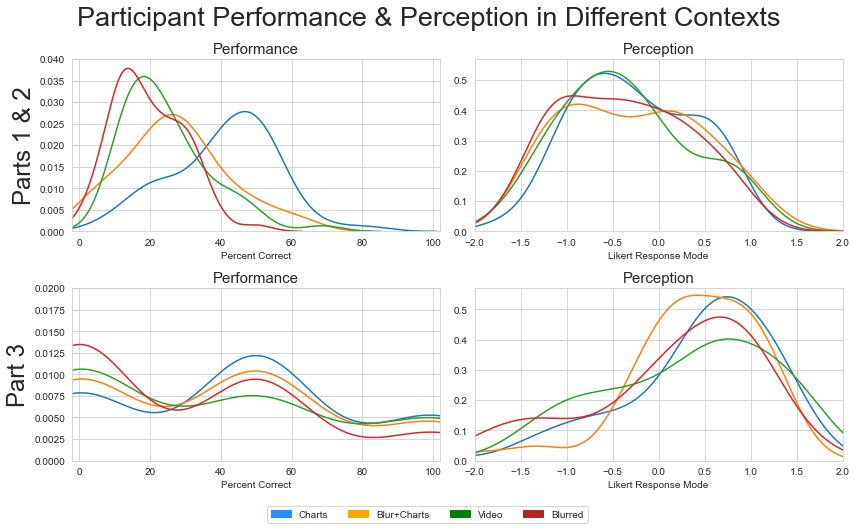

In [13]:

cp = sns.color_palette('tab10',4)
sns.set_palette(cp)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=rSz)

df = likertSlim.copy()
df['visuals'] = np.where(df['visuals']=="Visuals","Charts",
                        np.where(df['visuals']=="Blur_Plus_Vis","Blur+Charts",df['visuals']))
b_val = 1
gr=500
mult="layer"
# mult="stack"
# mult="fill"
likert_kde = {'bw_adjust': b_val, "common_norm":True, "bw_method":"scott", "multiple":mult, "gridsize":gr}
perc_kde = {'bw_adjust': b_val, "common_norm":True, "bw_method":"scott", "multiple":mult, "gridsize":gr}

hist_dict = {"density":True, "histtype": 'step', "align": "mid"}

for vis in ["Charts", "Blur+Charts", "Video", "Blurred"]:
    tmp = df[df['visuals']==vis]
    tp = "step"
    tmp1 = tmp[['1_2_correctedPerc','visuals']]
    tmp_ax = axes[0,0]
    g = sns.distplot(tmp['agTotPerc'], ax=tmp_ax, norm_hist=True, \
                     kde_kws=perc_kde, \
                     hist_kws=hist_dict, hist=False)
    tmp_ax.set_title("Performance",fontsize=fnt3)
    tmp_ax.set_ylabel("Parts 1 & 2",fontsize=fnt)
    tmp_ax.set_xlabel("Percent Correct")
    tmp_ax.set_xlim((-2,102))
    tmp_ax.set_ylim((0,0.04))
    
    tmp_ax = axes[0,1]
    g = sns.distplot(tmp['likertMode_Z'], ax=tmp_ax, norm_hist=True, \
                     kde_kws=likert_kde, \
                     hist_kws=hist_dict, hist=False)
    tmp_ax.set_title("Perception",fontsize=fnt3)
    tmp_ax.set_ylabel("",fontsize=fnt)
    tmp_ax.set_xlabel("Likert Response Mode")
    tmp_ax.set_xlim((-2,2))
    tmp_ax.set_ylim((0,0.57))
    
    tmp_ax = axes[1,0]
    g = sns.distplot(tmp['comp_correctedPerc'], ax=tmp_ax, norm_hist=True, \
                     kde_kws=perc_kde, \
                     hist_kws=hist_dict, hist=False)
    tmp_ax.set_title("Performance",fontsize=fnt3)
    tmp_ax.set_ylabel("Part 3",fontsize=fnt)
    tmp_ax.set_xlabel("Percent Correct")
    tmp_ax.set_xlim((-2,102))
    tmp_ax.set_ylim((0,0.02))
    
    tmp_ax = axes[1,1]
    g = sns.distplot(tmp['CompResponseMode_Z'], ax=tmp_ax, norm_hist=True, \
                     kde_kws=likert_kde, \
                     hist_kws=hist_dict, hist=False)
    tmp_ax.set_title("Perception",fontsize=fnt3)
    tmp_ax.set_ylabel("",fontsize=fnt)
    tmp_ax.set_xlabel("Likert Response Mode")
    tmp_ax.set_xlim((-2,2))
    tmp_ax.set_ylim((0,0.57))
    

legend_elements = [Patch(facecolor='dodgerblue', edgecolor='dodgerblue',
                         label='Charts'),
                   Patch(facecolor='orange', edgecolor='orange',
                         label='Blur+Charts'),
                   Patch(facecolor='green', edgecolor='g',
                         label='Video'),
                  Patch(facecolor='firebrick', edgecolor='firebrick',
                         label='Blurred')]

fig.legend(handles=legend_elements, bbox_to_anchor= (0.69, -0.0008), ncol=4)
fig.suptitle("Participant Performance & Perception in Different Contexts",fontsize=fnt+3)

plt.tight_layout()
if saveFigs:
    filename = "ParticipantPerformancePerceptionCurvesDifferentContexts.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    fig.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()

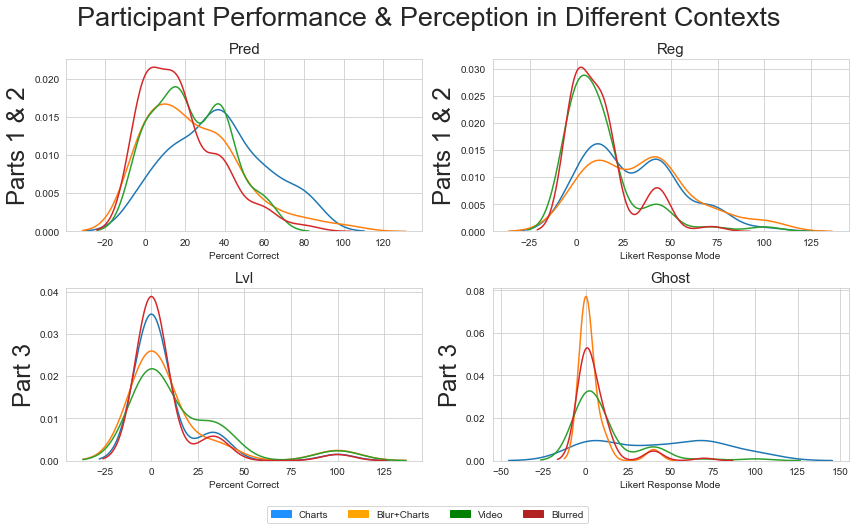

In [14]:
# 'pred_correctedNum', 'reg_correctedNum', 'level_correctedNum', 'ghosts_correctedNum'
cp = sns.color_palette('tab10',4)
sns.set_palette(cp)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=rSz)

df = likertSlim.copy()
df['visuals'] = np.where(df['visuals']=="Visuals","Charts",
                        np.where(df['visuals']=="Blur_Plus_Vis","Blur+Charts",df['visuals']))
b_val = 0.99
# b_val = 1
for vis in ["Charts", "Blur+Charts", "Video", "Blurred"]:
    tmp = df[df['visuals']==vis]
    tp = "step"
#     tmp1 = tmp[['1_2_correctedPerc','visuals']]
    tmp_ax = axes[0,0]
    g = sns.kdeplot(data=tmp,x='pred_correctedPerc',bw_adjust=b_val, ax=tmp_ax)
    tmp_ax.set_title("Pred",fontsize=fnt3)
    tmp_ax.set_ylabel("Parts 1 & 2",fontsize=fnt)
    tmp_ax.set_xlabel("Percent Correct")
#     tmp_ax.set_xlim((-20,125))
#     tmp_ax.set_ylim((0,0.0389))
    
    tmp_ax = axes[0,1]
    g = sns.kdeplot(data=tmp,x='reg_correctedPerc',bw_adjust=b_val, ax=tmp_ax)
    tmp_ax.set_title("Reg",fontsize=fnt3)
    tmp_ax.set_ylabel("Parts 1 & 2",fontsize=fnt)
    tmp_ax.set_xlabel("Likert Response Mode")
#     tmp_ax.set_xlim((-3.5,3.5))
#     tmp_ax.set_ylim((0,0.57))
    
    tmp_ax = axes[1,0]
    g = sns.kdeplot(data=tmp,x='level_correctedPerc',bw_adjust=b_val, ax=tmp_ax)
    tmp_ax.set_title("Lvl",fontsize=fnt3)
    tmp_ax.set_ylabel("Part 3",fontsize=fnt)
    tmp_ax.set_xlabel("Percent Correct")
#     tmp_ax.set_xlim((-20,125))
#     tmp_ax.set_ylim((0,0.0389))
    
    tmp_ax = axes[1,1]
    g = sns.kdeplot(data=tmp,x='ghosts_correctedPerc',bw_adjust=b_val, ax=tmp_ax)
    tmp_ax.set_title("Ghost",fontsize=fnt3)
    tmp_ax.set_ylabel("Part 3",fontsize=fnt)
    tmp_ax.set_xlabel("Likert Response Mode")
#     tmp_ax.set_xlim((-3.5,3.5))
#     tmp_ax.set_ylim((0,0.57))
    

legend_elements = [Patch(facecolor='dodgerblue', edgecolor='dodgerblue',
                         label='Charts'),
                   Patch(facecolor='orange', edgecolor='orange',
                         label='Blur+Charts'),
                   Patch(facecolor='green', edgecolor='g',
                         label='Video'),
                  Patch(facecolor='firebrick', edgecolor='firebrick',
                         label='Blurred')]

fig.legend(handles=legend_elements, bbox_to_anchor= (0.69, -0.0008), ncol=4)
fig.suptitle("Participant Performance & Perception in Different Contexts",fontsize=fnt+3)

plt.tight_layout()
if saveFigs:
    filename = "ParticipantPerformancePerceptionCurvesDifferentQ_Types.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    fig.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()

/Users/brittdavis/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/brittdavis/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/brittdavis/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword 

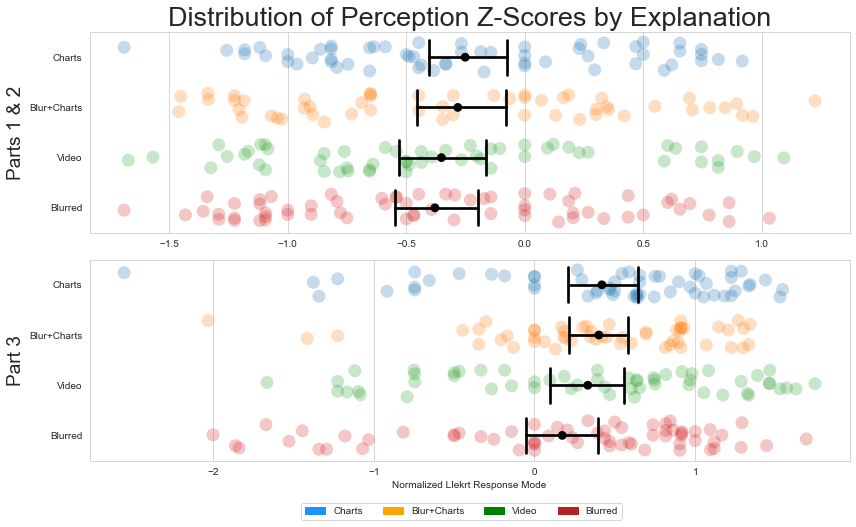

In [15]:
cp = sns.color_palette('tab10',4)
sns.set_palette(cp)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize= rSz)
al = 0.55

g = sns.stripplot('likertMode_Z','visuals',data=df, order=["Charts", "Blur+Charts", "Video","Blurred"],alpha=AL,s=13,ax=axes[0],jitter=0.3, zorder=1)
# g.set_xlim((0.5,5.5))
g.set_xlabel("")

df['totPerc'] = pd.to_numeric(df['totPerc'])
g = sns.pointplot('likertMode_Z','visuals',data=df, order=["Charts", "Blur+Charts", "Video","Blurred"],ax=axes[0],join=False, ci=95, color='black',capsize=0.7, zorder=10)
g.set_ylabel("Parts 1 & 2",fontsize=fnt2)
g.set_xlabel("")
g.set_title("Distribution of Perception Z-Scores by Explanation",fontsize=fnt+3)




g = sns.stripplot('CompResponseMode_Z','visuals',data=df, order=["Charts", "Blur+Charts", "Video","Blurred"],alpha=AL,s=13,ax=axes[1],jitter=0.3, zorder=1)
# g.set_xlim((0.5,5.5))
g.set_xlabel("")

df['totPerc'] = pd.to_numeric(df['totPerc'])
g = sns.pointplot('CompResponseMode_Z','visuals',data=df, order=["Charts", "Blur+Charts", "Video","Blurred"],ax=axes[1],join=False, ci=95, color='black',capsize=0.7, zorder=10)
g.set_ylabel("Part 3",fontsize=fnt2)
g.set_xlabel("Normalized LIekrt Response Mode")
g.set_title("",fontsize=fnt)

legend_elements = [Patch(facecolor='dodgerblue', edgecolor='dodgerblue',
                         label='Charts'),
                   Patch(facecolor='orange', edgecolor='orange',
                         label='Blur+Charts'),
                   Patch(facecolor='green', edgecolor='g',
                         label='Video'),
                  Patch(facecolor='firebrick', edgecolor='firebrick',
                         label='Blurred')]

fig.legend(handles=legend_elements, bbox_to_anchor= (0.73, 00.005), ncol=4)
# fig.suptitle("Participant Perception in Different Contexts",fontsize=fnt+3)

plt.tight_layout()
if saveFigs:
    filename = "NormedPerceptionJitterPlotsDifferentContexts.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    fig.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()

/Users/brittdavis/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/brittdavis/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/brittdavis/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword 

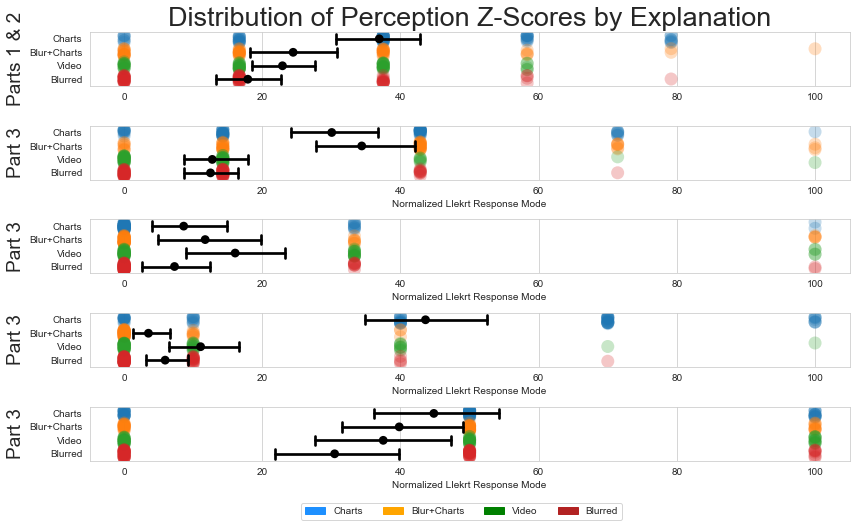

In [16]:
# 'pred_correctedNum', 'reg_correctedNum', 'level_correctedNum', 'ghosts_correctedNum'
cp = sns.color_palette('tab10',4)
sns.set_palette(cp)

fig, axes = plt.subplots(nrows=5, ncols=1, figsize= rSz)
al = 0.55

g = sns.stripplot('pred_correctedPerc','visuals',data=df, order=["Charts", "Blur+Charts", "Video","Blurred"],alpha=AL,s=13,ax=axes[0],jitter=0.3, zorder=1)
# g.set_xlim((0.5,5.5))
g.set_xlabel("")

# df['totPerc'] = pd.to_numeric(df['totPerc'])
g = sns.pointplot('pred_correctedPerc','visuals',data=df, order=["Charts", "Blur+Charts", "Video","Blurred"],ax=axes[0],join=False, ci=95, color='black',capsize=0.7, zorder=10)
g.set_ylabel("Parts 1 & 2",fontsize=fnt2)
g.set_xlabel("")
g.set_title("Distribution of Perception Z-Scores by Explanation",fontsize=fnt+3)




g = sns.stripplot('reg_correctedPerc','visuals',data=df, order=["Charts", "Blur+Charts", "Video","Blurred"],alpha=AL,s=13,ax=axes[1],jitter=0.3, zorder=1)
# g.set_xlim((0.5,5.5))
g.set_xlabel("")

# df['totPerc'] = pd.to_numeric(df['totPerc'])
g = sns.pointplot('reg_correctedPerc','visuals',data=df, order=["Charts", "Blur+Charts", "Video","Blurred"],ax=axes[1],join=False, ci=95, color='black',capsize=0.7, zorder=10)
g.set_ylabel("Part 3",fontsize=fnt2)
g.set_xlabel("Normalized LIekrt Response Mode")
g.set_title("",fontsize=fnt)




g = sns.stripplot('level_correctedPerc','visuals',data=df, order=["Charts", "Blur+Charts", "Video","Blurred"],alpha=AL,s=13,ax=axes[2],jitter=0.3, zorder=1)
# g.set_xlim((0.5,5.5))
g.set_xlabel("")

# df['totPerc'] = pd.to_numeric(df['totPerc'])
g = sns.pointplot('level_correctedPerc','visuals',data=df, order=["Charts", "Blur+Charts", "Video","Blurred"],ax=axes[2],join=False, ci=95, color='black',capsize=0.7, zorder=10)
g.set_ylabel("Part 3",fontsize=fnt2)
g.set_xlabel("Normalized LIekrt Response Mode")
g.set_title("",fontsize=fnt)





g = sns.stripplot('ghosts_correctedPerc','visuals',data=df, order=["Charts", "Blur+Charts", "Video","Blurred"],alpha=AL,s=13,ax=axes[3],jitter=0.3, zorder=1)
# g.set_xlim((0.5,5.5))
g.set_xlabel("")

# df['totPerc'] = pd.to_numeric(df['totPerc'])
g = sns.pointplot('ghosts_correctedPerc','visuals',data=df, order=["Charts", "Blur+Charts", "Video","Blurred"],ax=axes[3],join=False, ci=95, color='black',capsize=0.7, zorder=10)
g.set_ylabel("Part 3",fontsize=fnt2)
g.set_xlabel("Normalized LIekrt Response Mode")
g.set_title("",fontsize=fnt)




g = sns.stripplot('comp_correctedPerc','visuals',data=df, order=["Charts", "Blur+Charts", "Video","Blurred"],alpha=AL,s=13,ax=axes[4],jitter=0.3, zorder=1)
# g.set_xlim((0.5,5.5))
g.set_xlabel("")

# df['totPerc'] = pd.to_numeric(df['totPerc'])
g = sns.pointplot('comp_correctedPerc','visuals',data=df, order=["Charts", "Blur+Charts", "Video","Blurred"],ax=axes[4],join=False, ci=95, color='black',capsize=0.7, zorder=10)
g.set_ylabel("Part 3",fontsize=fnt2)
g.set_xlabel("Normalized LIekrt Response Mode")
g.set_title("",fontsize=fnt)






legend_elements = [Patch(facecolor='dodgerblue', edgecolor='dodgerblue',
                         label='Charts'),
                   Patch(facecolor='orange', edgecolor='orange',
                         label='Blur+Charts'),
                   Patch(facecolor='green', edgecolor='g',
                         label='Video'),
                  Patch(facecolor='firebrick', edgecolor='firebrick',
                         label='Blurred')]

fig.legend(handles=legend_elements, bbox_to_anchor= (0.73, 00.005), ncol=4)
# fig.suptitle("Participant Perception in Different Contexts",fontsize=fnt+3)

plt.tight_layout()
if saveFigs:
    filename = "NormedPerceptionJitterPlotsDifferentContexts.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    fig.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()

/Users/brittdavis/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/brittdavis/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/brittdavis/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword 

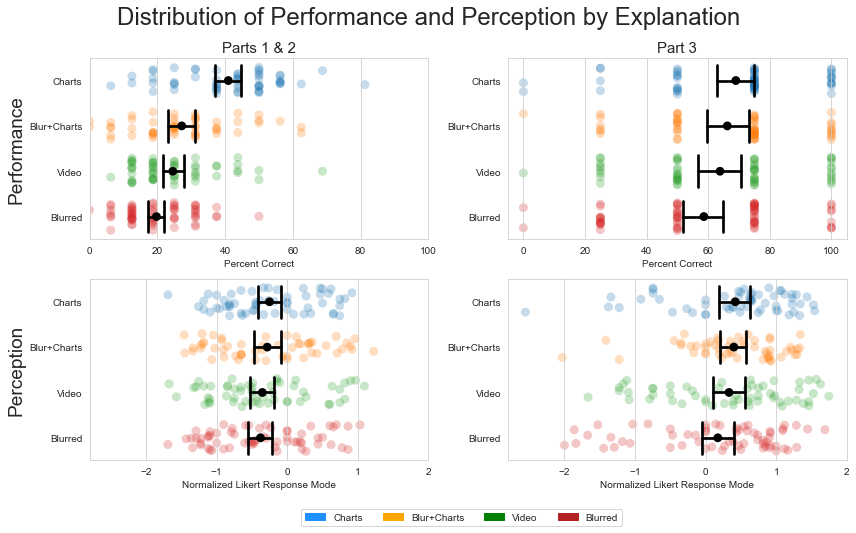

In [17]:

cp = sns.color_palette('tab10',4)
sns.set_palette(cp)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=rSz)
j = 0.31
al = 0.56
sZ=9

g = sns.stripplot('likertMode_Z','visuals',data=df, order=["Charts", "Blur+Charts", "Video","Blurred"],zorder=0,ax=axes[1,0],jitter=j,alpha=AL,s=sZ)
# g.set_xlim((0.5,5.5))
g.set_xlabel("")

df['totPerc'] = pd.to_numeric(df['totPerc'])
g = sns.pointplot('likertMode_Z','visuals',data=df, order=["Charts", "Blur+Charts", "Video","Blurred"],zorder=10,ax=axes[1,0],join=False, ci=95, color='black',capsize=0.7)
g.set_xlabel("Normalized Likert Response Mode")
g.set_ylabel("Perception", fontsize=fnt2)
g.set_xlim((-2.8,2))





g = sns.stripplot('CompResponseMode_Z','visuals',data=df,zorder=0, order=["Charts", "Blur+Charts", "Video","Blurred"],ax=axes[1,1],jitter=j,alpha=AL,s=sZ)
# g.set_xlim((0.5,5.5))
g.set_xlabel("")

df['totPerc'] = pd.to_numeric(df['totPerc'])
g = sns.pointplot('CompResponseMode_Z','visuals',data=df,zorder=10, order=["Charts", "Blur+Charts", "Video","Blurred"],ax=axes[1,1],join=False, ci=95, color='black',capsize=0.7)
g.set_xlabel("Normalized Likert Response Mode")
g.set_xlim((-2.8,2))
g.set_ylabel("")




g = sns.stripplot('agTotPerc','visuals',data=df,zorder=0, order=["Charts", "Blur+Charts", "Video","Blurred"],ax=axes[0,0],jitter=j,alpha=AL,s=sZ)
# g.set_xlim((0.5,100.5))
g.set_xlabel("")

df['totPerc'] = pd.to_numeric(df['totPerc'])
g = sns.pointplot('agTotPerc','visuals',data=df,zorder=10, order=["Charts", "Blur+Charts", "Video","Blurred"],ax=axes[0,0],join=False, ci=95, color='black',capsize=0.7)
g.set_xlabel("Percent Correct")
g.set_xlim((0,100))
g.set_ylabel("Performance", fontsize=fnt2)
g.set_title("Parts 1 & 2",fontsize=fnt3)


g = sns.stripplot('compPerc','visuals',data=df,zorder=0, order=["Charts", "Blur+Charts", "Video","Blurred"],ax=axes[0,1],jitter=j,alpha=AL,s=sZ)
# g.set_xlim((0.5,100.5))
g.set_xlabel("")

df['totPerc'] = pd.to_numeric(df['totPerc'])
g = sns.pointplot('compPerc','visuals',data=df,zorder=10, order=["Charts", "Blur+Charts", "Video","Blurred"],ax=axes[0,1],join=False, ci=95, color='black',capsize=0.7)
g.set_xlabel("Percent Correct")
g.set_ylabel("")
g.set_title("Part 3",fontsize=fnt3)

legend_elements = [Patch(facecolor='dodgerblue', edgecolor='dodgerblue',
                         label='Charts'),
                   Patch(facecolor='orange', edgecolor='orange',
                         label='Blur+Charts'),
                   Patch(facecolor='green', edgecolor='g',
                         label='Video'),
                  Patch(facecolor='firebrick', edgecolor='firebrick',
                         label='Blurred')]

fig.legend(handles=legend_elements, bbox_to_anchor= (0.73, -0.007), ncol=4)


fig.suptitle("Distribution of Performance and Perception by Explanation",fontsize=fnt)
plt.tight_layout()

if saveFigs:
    filename = "PerformancePerceptionJitterPlotsDifferentContexts.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    fig.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()

/Users/brittdavis/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


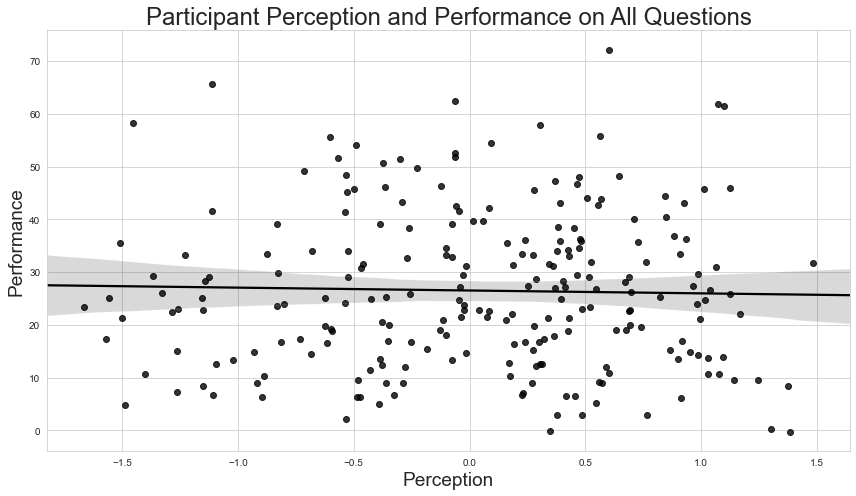

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=rSz)
df['totPerc'] = pd.to_numeric(df['totPerc'])
# axes.set_xlim((-1.25,1.25))
# axes.set_ylim((0,100))

g = sns.regplot('likertMode_All_Z', 'tot_correctedPerc', data=df, color="black", ax=axes, truncate=False, x_jitter=0.5, \
           y_jitter=0.5)
g.set_title("Participant Perception and Performance on All Questions", fontsize=fnt)
g.set_xlabel("Perception", fontsize=fnt2)
g.set_ylabel("Performance", fontsize=fnt2)
plt.tight_layout()

if saveFigs:
    filename = "CorrelationPlots.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    fig.savefig(filepath, dpi=300,facecolor='white', bbox_inches='tight')
plt.show()

In [42]:
# print(df.columns.tolist())

In [ ]:
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=rSz, sharex=True,sharey=True)

# df['totPerc'] = pd.to_numeric(df['totPerc'])
# sns.regplot('CompResponseMode_Z', 'compPerc_Z', data=df, ax=axes[1], truncate=False, color="black")

# df['totPerc'] = pd.to_numeric(df['totPerc'])
# sns.regplot('likertMode_Z', 'agTotPerc_Z', data=df, ax=axes[0], truncate=False, color="black")

# fig.suptitle("Participant Perception and Performance by Survey Section", fontsize=fnt)
# fig.supylabel("Performance", fontsize=fnt)
# fig.supxlabel("Perception", fontsize=fnt2)
# plt.tight_layout()

# if saveFigs:
#     filename = "CorrelationPlots_BySection.png"
#     filepath = os.path.join(save_path, filename)
#     if not os.path.isdir(save_path):
#         os.mkdir(save_path)
#     fig.savefig(filepath, dpi=300,facecolor='white', bbox_inches='tight')
# plt.show()

In [ ]:
# # legend_elements = [Patch(facecolor='dodgerblue', edgecolor='dodgerblue',
# #                          label='Charts'),
# #                    Patch(facecolor='orange', edgecolor='orange',
# #                          label='Blur+Charts'),
# #                    Patch(facecolor='green', edgecolor='g',
# #                          label='Video'),
# #                   Patch(facecolor='firebrick', edgecolor='firebrick',
# #                          label='Blurred')]

# colors = ['dodgerblue','orange','green','firebrick']

# fig, axes = plt.subplots(nrows=2, ncols=4, figsize=rSz, sharey=True, sharex=True)
# axes = axes.ravel()
# axes[0].set_xlim((df['likertMode_Z'].min(),df['likertMode_Z'].max()))

# for v_index, vis in enumerate(["Charts", "Blur+Charts", "Video","Blurred"]):

#     thisDF = df[df['visuals']==vis].copy()
#     sns.regplot('likertMode_Z', 'agTotPerc_Z', data=thisDF, ax=axes[v_index], color=colors[v_index], truncate=False)
#     axes[v_index].set_title(vis, fontsize=fnt3)
#     axes[v_index].set_xlabel("")
#     axes[v_index].set_ylabel("")
    
#     sns.regplot('CompResponseMode_Z', 'compPerc_Z', data=thisDF, ax=axes[v_index+4], color=colors[v_index],  truncate=False)
#     axes[v_index+4].set_xlabel("")
#     axes[v_index+4].set_ylabel("")
    
# axes[0].set_ylabel("Parts 1 & 2", fontsize=fnt3)
# axes[4].set_ylabel("Part 3", fontsize=fnt3)

# fig.suptitle("Participant Perception and Performance by Explanation Condition", fontsize=fnt)
# fig.supylabel("Performance", fontsize=fnt)
# fig.supxlabel("Perception", fontsize=fnt2)

# plt.tight_layout()

# if saveFigs:
#     filename = "CorrelationPlots_ByExplanation.png"
#     filepath = os.path.join(save_path, filename)
#     if not os.path.isdir(save_path):
#         os.mkdir(save_path)
#     fig.savefig(filepath, dpi=300,facecolor='white', bbox_inches='tight')
# plt.show()

/Users/brittdavis/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/brittdavis/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/brittdavis/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword 

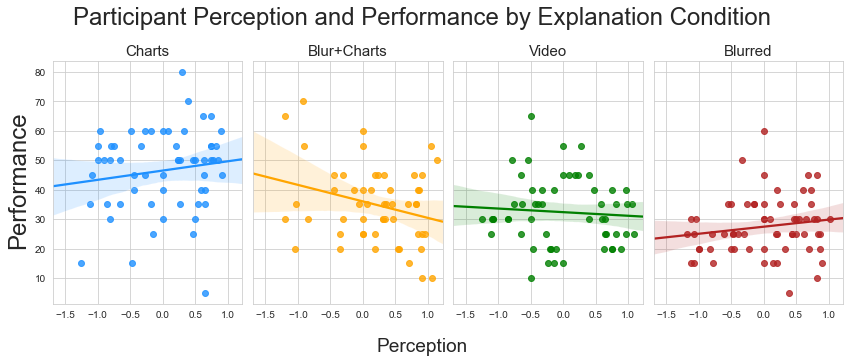

In [15]:
# legend_elements = [Patch(facecolor='dodgerblue', edgecolor='dodgerblue',
#                          label='Charts'),
#                    Patch(facecolor='orange', edgecolor='orange',
#                          label='Blur+Charts'),
#                    Patch(facecolor='green', edgecolor='g',
#                          label='Video'),
#                   Patch(facecolor='firebrick', edgecolor='firebrick',
#                          label='Blurred')]

colors = ['dodgerblue','orange','green','firebrick']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,5), sharey=True, sharex=True)
axes = axes.ravel()
axes[0].set_xlim((df['likertMode_Z'].min(),df['likertMode_Z'].max()))

for v_index, vis in enumerate(["Charts", "Blur+Charts", "Video","Blurred"]):

    thisDF = df[df['visuals']==vis].copy()
    sns.regplot('likertMode_All_Z', 'totPerc', data=thisDF, ax=axes[v_index], color=colors[v_index], truncate=False)
    axes[v_index].set_title(vis, fontsize=fnt3)
    axes[v_index].set_xlabel("")
    axes[v_index].set_ylabel("")
    
# axes[0].set_ylabel("Parts 1 & 2", fontsize=fnt3)
# axes[4].set_ylabel("Part 3", fontsize=fnt3)

fig.suptitle("Participant Perception and Performance by Explanation Condition", fontsize=fnt)
fig.supylabel("Performance", fontsize=fnt)
fig.supxlabel("Perception", fontsize=fnt2)

plt.tight_layout()

if saveFigs:
    filename = "CorrelationPlots_ByExplanation_AllTogether.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    fig.savefig(filepath, dpi=300,facecolor='white', bbox_inches='tight')
plt.show()

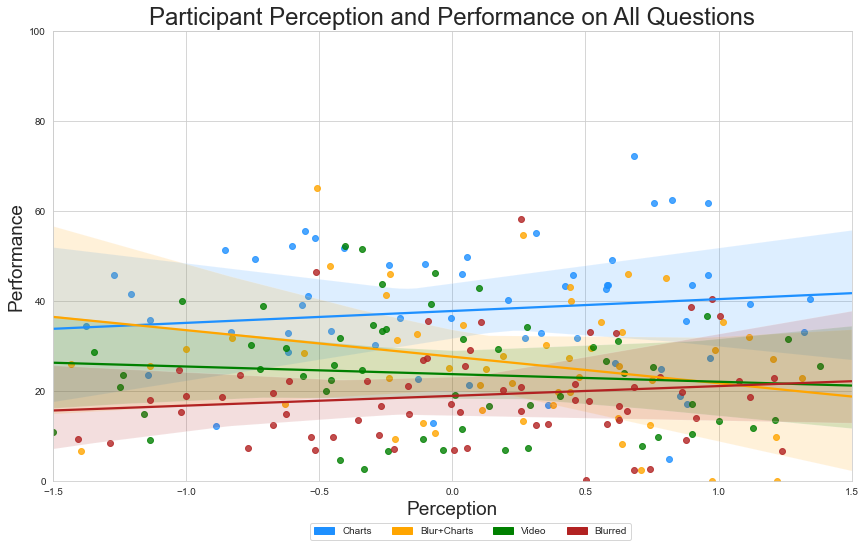

In [16]:
colors = ['dodgerblue','orange','green','firebrick']
df = likertSlim.copy()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=rSz)
axes.set_xlim((-1.5,1.5))
axes.set_ylim((0,100))
df['totPerc'] = pd.to_numeric(df['totPerc'])

for v_index, vis in enumerate(["Charts", "Blur+Charts", "Video","Blurred"]):
    thisDF = df[df['visuals']==vis].copy()
    g = sns.regplot(x='likertMode_All_Z', y='tot_correctedPerc', data=thisDF, color=colors[v_index], ax=axes,\
                   truncate=False, y_jitter=.5, x_jitter=.5, ci=100)
#     g.set_xlim((-1.1,1.1))
    plt.tight_layout()

g.set_title("Participant Perception and Performance on All Questions", fontsize=fnt)
g.set_xlabel("Perception", fontsize=fnt2)
g.set_ylabel("Performance", fontsize=fnt2)


legend_elements = [Patch(facecolor='dodgerblue', edgecolor='dodgerblue',
                         label='Charts'),
                   Patch(facecolor='orange', edgecolor='orange',
                         label='Blur+Charts'),
                   Patch(facecolor='green', edgecolor='g',
                         label='Video'),
                  Patch(facecolor='firebrick', edgecolor='firebrick',
                         label='Blurred')]

fig.legend(handles=legend_elements, bbox_to_anchor= (0.73, 00.005), ncol=4)
    
if saveFigs:
    filename = "CorrelationPlots.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    fig.savefig(filepath, dpi=300,facecolor='white', bbox_inches='tight')
plt.show()

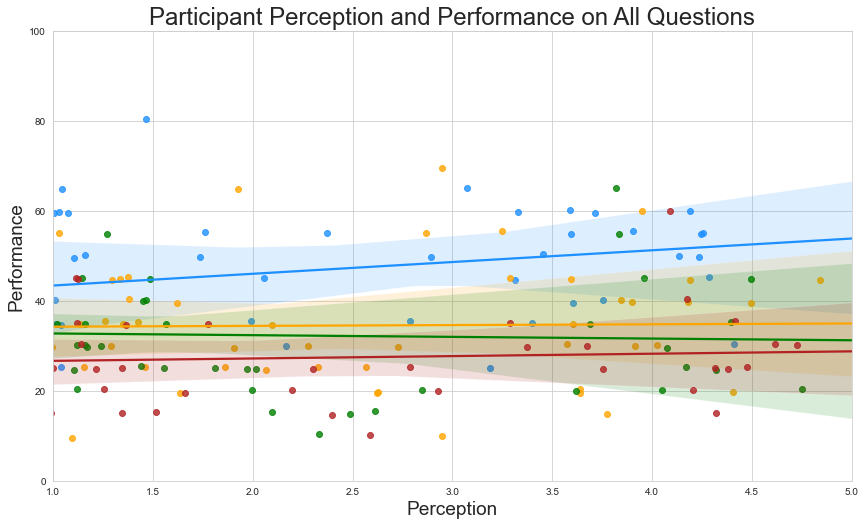

In [35]:
colors = ['dodgerblue','orange','green','firebrick']
df = likertSlim.copy()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=rSz)
axes.set_xlim((1,5))
axes.set_ylim((0,100))
# df['totPerc'] = pd.to_numeric(df['totPerc'])

for v_index, vis in enumerate(["Charts", "Blur+Charts", "Video","Blurred"]):
    thisDF = df[df['visuals']==vis].copy()
    g = sns.regplot(x='likertMode_AndComp', y='totPerc', data=thisDF, color=colors[v_index], ax=axes,\
                   truncate=False, y_jitter=.5, x_jitter=.5, ci=100)
#     g.set_xlim((-1.1,1.1))
    plt.tight_layout()

g.set_title("Participant Perception and Performance on All Questions", fontsize=fnt)
g.set_xlabel("Perception", fontsize=fnt2)
g.set_ylabel("Performance", fontsize=fnt2)

    
if saveFigs:
    filename = "CorrelationPlots.png"
    filepath = os.path.join(save_path, filename)
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    fig.savefig(filepath, dpi=300,facecolor='white', bbox_inches='tight')
plt.show()